## @yullano90 | Modelagem ● Relacionamento e Redundâncias

In [ ]:
# Faça referência à tabela "Alunos" da Aula 10.
# Renomeie a nova consulta como "Municípios", conforme abaixo:
-----------------------------------------------------------------------------------------------

let
    Source_Municípios = Alunos,

    Rmv_C = 
        Table.SelectColumns(
            Source_Municípios,{"mun_nome"}
            ),

    Dup_C = 
        Table.DuplicateColumn(
            Rmv_C, "mun_nome", "mun_nome - Copiar"
            ),

    Dvd_C = 
        Table.SplitColumn(
            Dup_C, 
            "mun_nome - Copiar", 
            Splitter.SplitTextByDelimiter("/", QuoteStyle.Csv), 
            {
                "mun_nome - Copiar.1", "mun_nome - Copiar.2"
            }
        ),

    Rnm_C = 
        Table.RenameColumns(
            Dvd_C,
            {
                {"mun_nome", "mun_nome_completo"}, 
                {"mun_nome - Copiar.1", "mun_nome"}, 
                {"mun_nome - Copiar.2", "mun_uf"}
                }
            ),

    Rmv_Dup = Table.Distinct(Rnm_C)

in
    Rmv_Dup

-----------------------------------------------------------------------------------------------

In [ ]:
# Faça uma mesclagem da "Municípios" com "Alunos", trazendo o código do aluno.
-----------------------------------------------------------------------------------------------

    Merge_C = 
        Table.NestedJoin(
            Rmv_Dup, 
            {"mun_nome_completo"}, Alunos, 
            {"mun_nome"}, "Alunos", JoinKind.Inner
            ),

    Expans_C = 
        Table.ExpandTableColumn(
            Merge_C, "Alunos", 
            {"alu_codigo"}, {"alu_codigo"}

-----------------------------------------------------------------------------------------------
           

In [3]:
# Relacione essas tabelas em seguida (Atenção à Cardinalidade) e crie uma matriz elecando.
# Nome_aluno, Município e Estado , considere um munícipo para "N" alunos.

In [5]:

# OBS: A detecção automática de relacionamentos pode ser perigosa se variás tabelas forem carregadas, fichãã?!!!
# Use com moderação ainnnnn, já pensou carregar 50 tabelas, vai confiar em 100% dos relacionamentos? #FIcaaDicãã


In [ ]:
# Faça a mesclagem retornando uma coluna com o código de "Formações" em "Cursos".
# Logo após, elimine redudâncias:
----------------------------------------------------------------------------------

    Merge_C_For = 
        Table.NestedJoin(
            Type_C, 
            {"for_nome"}, Formações, 
            {"for_nome"}, "Formações", 
            JoinKind.Inner
            ),

        
    Expans_C_For = 
        Table.ExpandTableColumn(
            Merge_C, 
            "Formações", 
            {"for_codigo"}, {"for_codigo"}
            ),
        
----------------------------------------------------------------------------------

In [ ]:
# Em seguidãã, faça a mesclagem retornando uma coluna com o código de "Instrutores" em "Cursos".
# Logo após, elimine redudâncias:
----------------------------------------------------------------------------------
    Merge_C_Inst = 
        Table.NestedJoin(
            Rmv_C, 
            {"cur_instrutor_principal"}, Instrutores, 
            {"ins_nome"}, "Instrutores", 
            JoinKind.Inner
            ),

        
    Expans_C_Inst = 
        Table.ExpandTableColumn(
            Merge_C_Inst, "Instrutores", 
            {"ins_codigo"}, {"ins_codigo"}
            ),
        
----------------------------------------------------------------------------------

In [1]:
# Pra finalizar nosso aulãã, faça uma pequena Matriz, informando o instrutor e seu nível ("Instrutores"), o curso ("Cursos")
# Com esse resultado, temos a confirmação de uma modelagem bem feitããã! Ainn.

In [2]:
# Espera-se que até o momento a modelagem esteja semlhante a imagem abaixo:

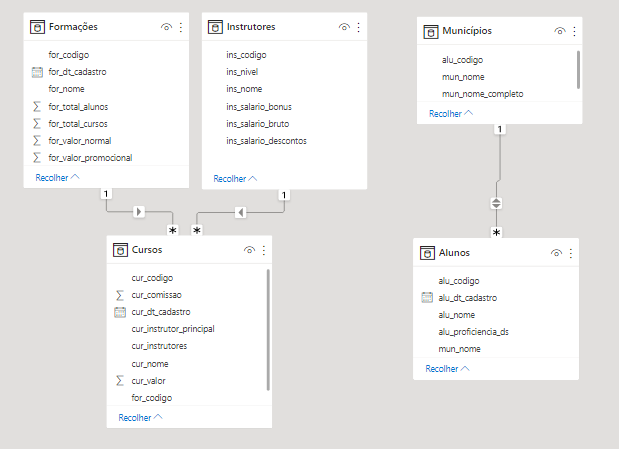